### I: Load the data and get an overview of the data

In [49]:
import pandas as pd

df = pd.read_csv('../data/ISLR/data/Carseats.csv', index_col=0)

In [50]:
predictors_and_response = df.columns[1:]
print(len(predictors_and_response))
print(predictors_and_response.values)

10
['CompPrice' 'Income' 'Advertising' 'Population' 'Price' 'ShelveLoc' 'Age'
 'Education' 'Urban' 'US']


In [51]:
from pandas.api.types import is_numeric_dtype

for column in predictors_and_response.values:
    if is_numeric_dtype(df[column]):
        print(f'{df[column].describe()}\n')
    else:
        print(f'{df[column].value_counts()}\n')

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

Medium    219
Bad        96
Good       

In [52]:
len(df)

400

In [53]:
df.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7,6.63,115,105,0,45,108,Medium,71,15,Yes,No
8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
9,6.54,132,110,0,108,124,Medium,76,10,No,No
10,4.69,132,113,0,131,124,Medium,76,17,No,Yes


             CompPrice    Income  Advertising  Population     Price       Age  \
CompPrice     1.000000 -0.080653    -0.024199   -0.094707  0.584848 -0.100239   
Income       -0.080653  1.000000     0.058995   -0.007877 -0.056698 -0.004670   
Advertising  -0.024199  0.058995     1.000000    0.265652  0.044537 -0.004557   
Population   -0.094707 -0.007877     0.265652    1.000000 -0.012144 -0.042663   
Price         0.584848 -0.056698     0.044537   -0.012144  1.000000 -0.102177   
Age          -0.100239 -0.004670    -0.004557   -0.042663 -0.102177  1.000000   
Education     0.025197 -0.056855    -0.033594   -0.106378  0.011747  0.006488   

             Education  
CompPrice     0.025197  
Income       -0.056855  
Advertising  -0.033594  
Population   -0.106378  
Price         0.011747  
Age           0.006488  
Education     1.000000  


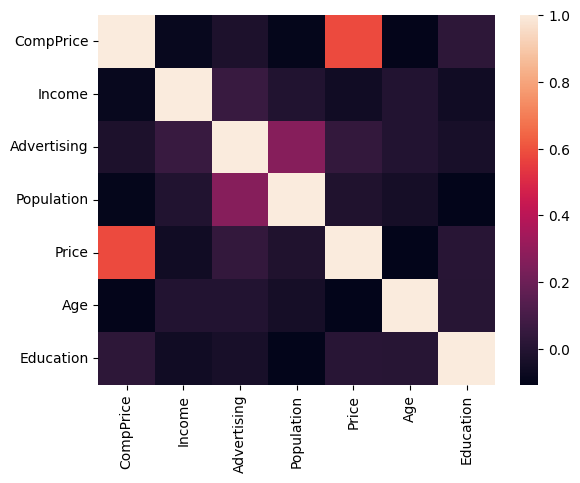

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_predictors = []
for col in predictors_and_response:
    if is_numeric_dtype(df[col]):
        numeric_predictors.append(col)

cm = df[numeric_predictors].corr()
print(cm)
sns.heatmap(cm)
plt.show()

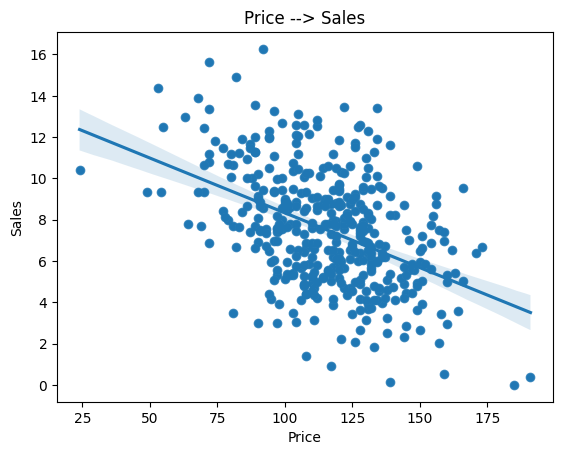

In [55]:
sns.scatterplot(df, x='Price', y='Sales')
sns.regplot(df, x='Price', y='Sales',)
plt.title(f'Price --> Sales')
plt.show()

#### I: Interprete the results.

### I: Learn and assess Classification Trees

In [56]:
high = df['Sales'].apply(lambda s: "Yes" if s > 8 else "No")
high

1      Yes
2      Yes
3      Yes
4       No
5       No
      ... 
396    Yes
397     No
398     No
399     No
400    Yes
Name: Sales, Length: 400, dtype: object

In [64]:
from sklearn.tree import DecisionTreeClassifier as DTC
from ISLP.models import ModelSpec as MS

design = MS(df.columns.drop('Sales'), intercept=False)

design.fit_transform(df)

# X = design.fit_transform(df)
# y = high

# clf = DTC(criterion='entropy',
#         max_depth=3,
#         random_state=0)
# clf.fit(X, y)

# ct


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,138,73,11,276,120,Bad,42,17,Yes,Yes
2,111,48,16,260,83,Good,65,10,Yes,Yes
3,113,35,10,269,80,Medium,59,12,Yes,Yes
4,117,100,4,466,97,Medium,55,14,Yes,Yes
5,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
396,138,108,17,203,128,Good,33,14,Yes,Yes
397,139,23,3,37,120,Medium,55,11,No,Yes
398,162,26,12,368,159,Medium,40,18,Yes,Yes
399,100,79,7,284,95,Bad,50,12,Yes,Yes
